Importing relevant Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [3]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
df = df.drop("Serial No.",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [8]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [9]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
41,316,105,2,2.5,2.5,8.20,1
26,322,109,5,4.5,3.5,8.80,0
393,317,104,2,3.0,3.0,8.76,0
281,317,110,3,4.0,4.5,9.11,1
351,325,110,4,3.5,4.0,8.67,1
...,...,...,...,...,...,...,...
308,312,108,3,3.5,3.0,8.53,0
404,311,101,3,2.0,2.5,7.64,1
266,312,105,2,2.0,2.5,8.45,0
323,305,102,2,2.0,2.5,8.18,0


In [12]:
Y_train

,Chance of Admit
41,0.49
26,0.76
393,0.77
281,0.80
351,0.73
...,...
308,0.69
404,0.62
266,0.72
323,0.62


In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[0.52      , 0.46428571, 0.25      , ..., 0.28571429, 0.44871795,
        1.        ],
       [0.64      , 0.60714286, 1.        , ..., 0.57142857, 0.64102564,
        0.        ],
       [0.54      , 0.42857143, 0.25      , ..., 0.42857143, 0.62820513,
        0.        ],
       ...,
       [0.44      , 0.46428571, 0.25      , ..., 0.28571429, 0.52884615,
        0.        ],
       [0.3       , 0.35714286, 0.25      , ..., 0.28571429, 0.44230769,
        0.        ],
       [0.64      , 0.64285714, 0.5       , ..., 0.28571429, 0.59935897,
        1.        ]])

In [15]:
X_train.shape

(400, 7)

In [16]:
X_train_scaled.shape

(400, 7)

Training the Model

In [17]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
history = model.fit(X_train_scaled, Y_train, epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2228 - val_loss: 0.1594
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1328 - val_loss: 0.0821
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0685 - val_loss: 0.0395
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0325 - val_loss: 0.0221
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0215 - val_loss: 0.0182
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213 - val_loss: 0.0177
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - val_loss: 0.0172
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - val_loss: 0.0168
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0197 - val_loss: 0.0165
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0186 - val_loss: 0.0161
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190 - val_loss: 0.0157
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [21]:
Y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [22]:
r2_score(Y_test, Y_pred)

0.8015747884012274

Visualizations

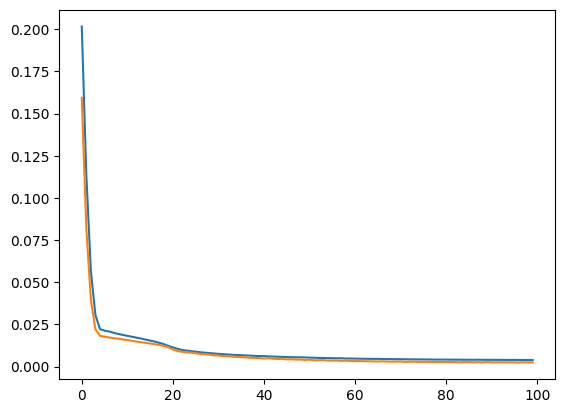

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])